## Lab 4 Solving a regression problem using techniques in Lec 4
Develop regressors using the techniques covered in Lec 4 to predict the value of a house price.

## Solving a regression problem
In order to solve a regression problem, the following steps need to be taken:
1. Find a suitable dataset
2. Define the input dataset
3. Explore the input dataset.
After exploration, it may be needed to pre-process the dataset in real-world classification problems,i.e., to clean and pre-process the input dataset to make it ready for model development. In this example, the dataset is clean so there is no need for pre-processing.
4. Form the training dataset and test dataset
6. Train the regressor using the chosen algorithm
7. Evaluate the regressor
8. Deploy the regressor to solve the target regression problem (not covered in this notebook)

### Findnig a Dataset

In order to solve the target regression problem, a HousePrice dataset is found from https://gist.github.com/grantbrown/5853625

Information about this dataset: This dataset contains 429 items, where each item refers to a house. It has three columns as listed below:

1. HouseAge in year
2. HouseSize in $m^2$
3. HousePrice in $

The input features are `HouseAge` and `HouseSize` and the attribute to be predicted or target attribute/variable is `HousePrice`.


####Problem Representaiton:
- Input Feature(x): HouseAge, HouseSize
- Target Variable(y): HousePrice

It aims to predict the HousePrice based on the HouseAge and HouseSize using Linear Regression.

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
cd /content/drive/MyDrive/Introduction to AI/Lab4 package

/content/drive/MyDrive/Introduction to AI/Lab4 package


## Section 1

Load and preview teh dataset to understand the data I will be working with

Importing the pandas library and use it to read the CSV file containting the dataset. The print(data.head()) statement displays the first rows giving it insights into the data's structure and confirming that it has been loaded correctly.

In [185]:
# Import pandas package
import pandas as pd


In [195]:
# Load the dataset from the CSV file
data = pd.read_csv('HousingData.csv')

In [196]:
# Take a look at the first few samples of data using the method head() of a pandas dataframe, by default, 5 samples
print(data.head())

     HouseAge  HouseSize    HousePrice
0  201.527404          2  71070.507960
1   94.202489          2  74816.492189
2  152.275420          3  82961.801149
3  147.102698          3  93921.313952
4   54.676407          3  92954.430014


## Section 2

### Form the training dataset, test dataset and futureSample set

#### Create the training and test datasets

Prepare the data for model training and evaluation by splitting it into training and testing sets and aside future samples.

- import train_test_split to partition our dataset
- define x(feature) and y(target variable).
- split the data, reserving 80% for training and 20% for testing.
- set aside two samples as futureSample_X and futureSample_y to simulate new, unseen data that might be encountered after deploy
- remove these future samples from the test set to ensure our evaluation is not biased.

In [169]:
# Import train_test_split from sklearn.model.selection
from sklearn.model_selection import train_test_split

Define the input features X and the target attribute/variable using two ways

In [170]:
# option1

# Define the input features X  directly using specific columns
X = data[['HouseAge', 'HouseSize']]
y = data['HousePrice']

In [171]:
# Option2

# Define the input features X as all columns except 'HousePrice' column and target variable y as the "HousePrice" column
X = data.drop('HousePrice', axis=1)
y = data['HousePrice']

In [172]:
# Using train_test_split function from sklearn to split the dataset into the training and test datasets,
# test_size=0.2, the percentage of samples in the test dataset is 20%
#random_state=42 ensures reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [173]:
# Set aside futureSample test datasets
# Take two samples from the testset as the future data samples, called futureSample_X, and futureSample_y,
# as the inputs from the real-world cases when the classifier is deployed.

# Get the last two samples from the test  to be the future data samples
futureSample_X = X_test[-2:]
futureSample_y = y_test[-2:]

# Remove the last two samples from the test dataset
X_test = X_test[:-2]
y_test = y_test[:-2]

## Section 3

### Explore the training and test datasets
Visualise the relationshop between the feature and the target variable in both training and testing datasets.

- import matplotlib.pyplot as for plotting.
- create scatter plots to observe how HouseSize relates to HousePrice.
- colour mapping (c=y_train and c=y_test) is used to enhance visualisation
- visual exploration helps it undearstand if a linear relationshoiop exists, justifying the use of Linear Regressions.


In [174]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

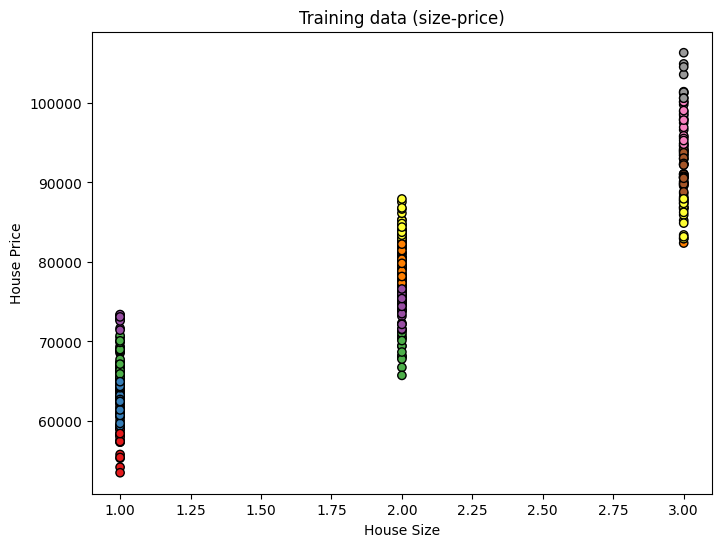

In [175]:
# Using the example of plotting the samples in the training dataset (age-price), plot the samples in the training dataset (size-price)
plt.figure(1, figsize=(8, 6))
plt.scatter(X_train['HouseSize'], y_train, c=y_train, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.title("Training data (size-price)")
plt.show()

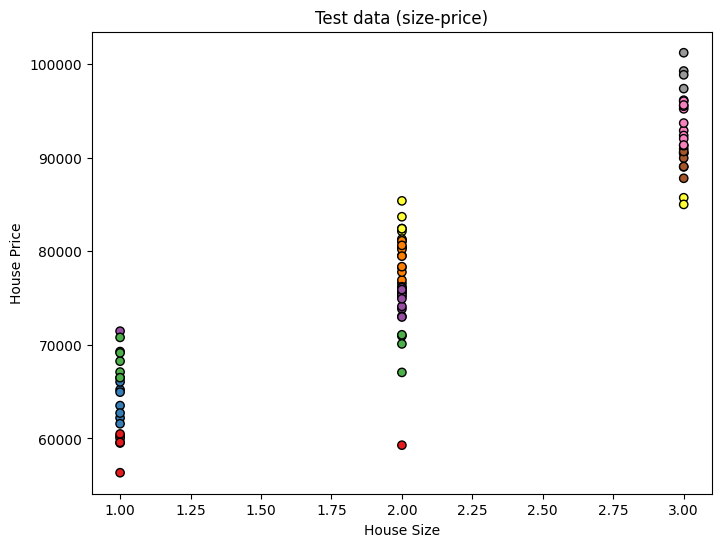

In [176]:
# Use the example of plotting the samples in the test dataset (age-price), plot the samples in the test dataset (size-price)
plt.figure(4, figsize=(8, 6))
plt.scatter(X_test['HouseSize'], y_test, c=y_test, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.title("Test data (size-price)")
plt.show()

## Section 4

### Train a regressor by using a chosen learning algorithm with the trainig dataset.

***First***, take an integer in the range of 1-5 from the user and save it to `model_option` to represent a model.

`model_option`:
* 1- Support vector regression,
* 2- linear regression,
* 3- K nearest neighbours and
* 4- decision tree
* 5- Random forest

If a user enters a number  >5, print out a message "invalid option number. Try again".

***Second***, train the model using the train dataset

***Third***, evaluate the model using the test dataset

***Lastly***, consume the model using the futureSample test dataset

In [197]:
# Prompt the user to choose the regression model
model_option = int(input("Choose one model from the following: 1-Support vector regression, 2- linear regression, 3- K nearest neighbours, 4-decision tree and 5-Random Forest \n your choice: "))
if (model_option == 1):
    # Import SVR from sklearn.svm.
    from sklearn.svm import SVR
    """
    Call the constructor SVR() to create a SVR object, name it as 'model', by passing the following key parameters:

    (i)  'kernel': Specifies the kernel type to be used in the algorithm. possible values are ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ and ‘precomputed’.
         Default is ’rbf’.
    (ii) 'degree': Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels. Default=3
    (iii) 'gamma': Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
          Possible values are ‘scale’ (1 / (n_features * X.var())) and ‘auto’ (1 / n_features).
          Default is ’scale’.
    (iv)  'C': Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
        Default=1.0
    (v) 'epsilon': Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.
        Must be non-negative. Default=0.1
    (vi) 'max_iter': Hard limit on iterations within solver, or -1 for no limit. Default is -1.
    """
    model = SVR(gamma='auto')
    # Train this model using the training dataset (X_train, y_train).
    model.fit(X_train, y_train)
elif (model_option == 2):
    #  Import LinearRegression from sklearn.linear_model.
    from sklearn.linear_model import LinearRegression
    """
    Call the constructor LinearRegression() to create a linear regression object, name it as 'model', by passing the following parameters:
    (i) 'fit_intercep': Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered). Default=True
    (ii) 'copy_X': If True, X will be copied; else, it may be overwritten. Default=True
    """
    model = LinearRegression()
    # Train this model using the training dataset (X_train, y_train).
    model.fit(X_train, y_train)
elif (model_option == 3):
    # Import KNeighborsRegressor from sklearn.neighbors.
    from sklearn.neighbors import KNeighborsRegressor
    """
    Call the constructor KNeighborsRegressor() to create a KNN regressor, name it as 'model', by passing the following parameters:
    (i) 'n_neighbors': Number of neighbors to use by default for kneighbors queries. Default is 5.
    (ii) 'weights': Weight function used in prediction. Possible values are ‘uniform’ (uniform weights),
         ‘distance’ (weight points by the inverse of their distance) and
         [callable] (a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights). Default = 'uniform'
    (iii) 'algorithm': Algorithm used to compute the nearest neighbors. Possible values are ‘auto’ (attempt to decide the most appropriate algorithm based on the values passed to fit method),
          ‘ball_tree’ (use BallTree), ‘kd_tree’ (use KDTree), and ‘brute’ (use a brute-force search). Default is ’auto’.
    (iv) 'metric': Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2.
    """
    model = KNeighborsRegressor(n_neighbors=3)
    # Train this model using the training dataset (X_train, y_train).
    model.fit(X_train, y_train)
elif (model_option == 4):
    #  Import DecisionTreeRegressor from sklearn.tree.
    from sklearn.tree import DecisionTreeRegressor
    """
    Call the constructor DecisionTreeRegressor () to create a decision tree regressor, name it as 'model', by passing the following key parameters:
    (i) "criterion": The function to measure the quality of a split.
         Possible options are “squared_error” (the mean squared error), “friedman_mse” ( mean squared error with Friedman’s improvement score),
         “absolute_error” (the mean absolute error, which minimizes the L1 loss using the median of each terminal node), “poisson” (uses reduction in Poisson deviance to find splits).
         Default=”squared_error”
    (ii) "splitter": The strategy used to choose the split at each node.
          Supported strategies are “best” to choose the best split and “random” to choose the best random split. Default is ”best”.
    (iii) "max_depth": Maximum depth of the tree. If None, nodes are expanded until all leaves are pure or contains fewer than `min_samples_split` samples
    (iv) "min_samples_split": Minimum number of samples required to split an internal node, default is 2
    (v) "min_samples_leaf" Minimum number of samples required to be at a leaf node. default is 1.
    (vi) "max_features": number of features to consider when looking for the best split, default is None (max_features=n_features).
        Other values are 'sqrt' (max_features=sqrt(n_features)) and "log2” (max_features=log2(n_features))
    (vii) "random_state": Controls the randomness of the estimator. default is None.
          To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer, say random_state = 42.
    (viii) 'min_impurity_decrease': A node will be split if this split induces a decrease of the impurity greater than or equal to this value. Default=0.0.
    """
    model = DecisionTreeRegressor()
    # Train this DT regressor using the training data set (X_train, y_train).
    model.fit(X_train, y_train)
elif (model_option == 5):
    # Import Random forest regreesor from sklearn.ensemble.
    from sklearn.ensemble import RandomForestRegressor
    """
    Call the constructor RandomForestRegressor () to create a random forest regreesor, name it as 'model', by passing the following key parameters:
    (i) 'n_estimator': Number of trees in the forest, default is 100
    (ii) "criterion": The function to measure the quality of a split.
         Possible options are “squared_error” (the mean squared error), “friedman_mse” ( mean squared error with Friedman’s improvement score),
         “absolute_error” (the mean absolute error, which minimizes the L1 loss using the median of each terminal node), “poisson” (uses reduction in Poisson deviance to find splits).
         Default=”squared_error”
    (iii) "max_depth": Maximum depth of the tree. If None, nodes are expanded until all leaves are pure or contains fewer than `min_samples_split` samples
    (iv) "min_samples_split": Minimum number of samples required to split an internal node, default is 2
    (v) "min_samples_leaf" Minimum number of samples required to be at a leaf node. default is 1.
    (vi) "max_features": number of features to consider when looking for the best split, default is None (max_features=n_features).
        Other values are 'sqrt' (max_features=sqrt(n_features)) and "log2” (max_features=log2(n_features)).
    (vii) 'min_impurity_decrease': A node will be split if this split induces a decrease of the impurity greater than or equal to this value. Default=0.0.
    (viii)'bootstrap': Whether to use bootstrap samples when building trees, default is 'True'.
          If 'False', the entire dataset is used to build each tree, which may lead to overfitting.
    (ix)   'oob_score': Whether to use out-of-bag samples to estimate the generalisation accuracy.
          default value is 'False'. If 'True', an unbiased estimate of the model performance is provided.
    (x) 'max_samples': If bootstrap is True, the number of samples to draw from X to train each base estimator. If None (default), then draw X.shape[0] samples. Default=None
    (xi) "random_state": Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and
         the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
         Default is None.
    """
    model = RandomForestRegressor(n_estimators=3, max_depth=3, max_features=2, max_samples=100, random_state=12)
    # Train this model using the training dataset (X_train, y_train).
    model.fit(X_train, y_train)
else: print("invalid option number. Try again")


Choose one model from the following: 1-Support vector regression, 2- linear regression, 3- K nearest neighbours, 4-decision tree and 5-Random Forest 
 your choice: 2


Train a regression model using the chosen algorithm

- For Linear Regression:
  - import LinearRegression from sklear.linear_model
  - create an instance of LinearRegression() named model
  - train the model using model.fit(X_train, y_train), where it learns the relationship between the feature and the target variable


Linear Regression attempts to model the relationship between two or more variables by fitting a linear equation to observed data.

It finds the best-fitting straight line (in higher dimensions, a hyperplane) through the data point

The model learns coefficients (weights) for each feature that minimise the residual sum of squares between the observed targets and the targets predicted by the linear approximation.

## Section 5

### Evaluate a regression model
Evaluate the performance of the trained regression model using the test dataste.

#### Predictions:
- use model.predict(X_test) to predict house prices for the the test data.

#### Evaluation Metrics:
- R-squared Score (r2_score): Measures how well the variance in the dependent variable is explained by the independent variables.
- Mean Abolute Error (mean_absolute_error): The average absolute difference between predicted and acutal values.
- Mean Absolute Percentage Err (MAPE): The average squared differences between predicted and acutal values.

#### Visualisation:
- plot a scatter plot of actual versus predidcted house prices
- a diagonal line is added to indicate where predictions perfectly match actual values.

#### Interpretation:
- these metrics and the plot help us understand the accuracy and reliability of our model
- A higher R-squared and lower MAE, MAPE and RMSE indicate better model performance

In [189]:
# Import required package for evaluating a regression model
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

Test the regression model's performance using the method `predict()` to calculate the predicted values of test data and store the values in a variable, `solution_test`, and use a number of measures to evaluate the performance of this model.

In [190]:
# Predicted values of samples in the test dataset
y_pred = model.predict(X_test)

In [191]:
# Calculate the R square of predicted values of samples in the test dataset using the method r1_score() in metrics
r2_test = metrics.r2_score(y_test, y_pred)
print(r2_test)

0.8501278689015999


In [192]:
# Calculate the MAE(Mean Absolute Error) of predicted values of samples in the test dataset using the method mean_absolute_error() in metrics
mean_absolute_error_test = metrics.mean_absolute_error(y_test, y_pred)
print(mean_absolute_error_test)

3461.8751548330983


In [193]:
# Import numpy as np
import numpy as np

# Define a function MAPE() which takes y as the true value and y_predict as the predicted value and returns the Mean Absolute Percentage Error over the test dateset. One sample's Absolute Percentage Error is calculated as: abs((y-y')*100/y)
# Use the methods mean() and abs() in numpy
def MAPE(y, y_predict):
    return np.mean(np.abs((y - y_predict) / y)) * 100

# Calculate the MAPE using the function MAPE() and y=y_test and y_predict = y_pred
mape_test = MAPE(y_test, y_pred)
print(mape_test)

4.614627329363477


In [194]:

# Calculate RMSE(Root Mean Squared Error) using the method sqrt() in numpy and mean_squared_error() in metrics
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse_test)

4414.184020989217


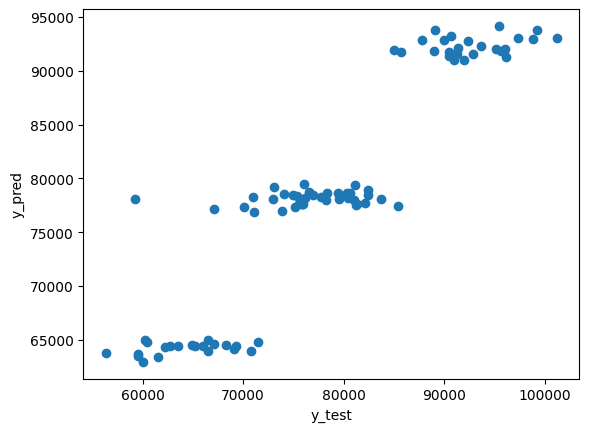

In [181]:
# Present the regression plot
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

## Section 6

### Predict the values for the data samples in the future sample set
Use the futureSample_X to simulate the new data items in a real-world application scenario. Use the method `predict()` to calculate the predicted values of futureSample data and store the values in a variable, `solution_validate`.

In [182]:
# Predicted values of samples in the futureSample dataset
solution_validate = model.predict(futureSample_X)


In [183]:
# Convert the DataFrame to a list
futureSample_X = futureSample_X.values.tolist()
futureSample_y = futureSample_y.tolist()

In [184]:
# Display the comparison of the predicted and actual values of samples in the futureSample dataset
for i in range (2):

    print("For the {} future data, {}, the predicted value is {} and the actual value is {}".format(i, futureSample_X[i], solution_validate[i], futureSample_y[i]))

For the 0 future data, [47.7449423018962, 1.0], the predicted value is 64316.27310043594 and the actual value is 60018.9900897455
For the 1 future data, [176.265168757552, 3.0], the predicted value is 91882.2245986709 and the actual value is 92829.7344914557


Use the trained model to predict house prices for new, unseen data and compare the predictions to actual valuse.

- predict the house prices for futureSample_X using model.predict().
- convert the features and actual prices to lists for better readability.
- iterate ove the future samples and print out:
  - the features (HosueAge and HouseSize)
  - The predicted price
  - the actual price

it helps assess the model's generalisation capabilites.
